In [78]:
import pandas as pd
import numpy as np
from pandas import read_excel
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.metrics as sk

from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score

In [53]:
data = pd.read_excel('training.xlsx', index_col=0)
data.tail()

,Value
Date,
1988-08-01,63.8851
1988-09-01,63.7040
1988-10-01,64.0220
1988-11-01,64.1173
1988-12-01,64.4210


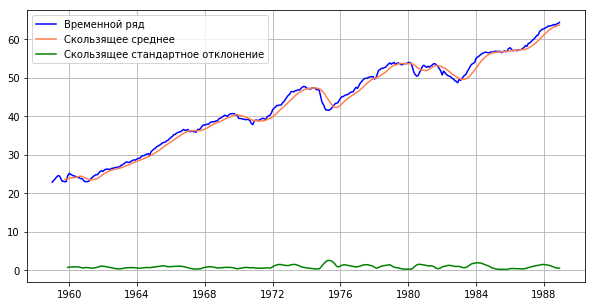

In [44]:
v=data.Value
plt.figure(figsize=(10,5))
plt.plot(data.Date, data.Value,'b', label = 'Временной ряд')
plt.plot(data.Date, data.Value.rolling(window=10).mean(), 'coral', label = 'Скользящее среднее')
plt.plot(data.Date, data.Value.rolling(window=12).std(), 'green', label = 'Скользящее стандартное отклонение')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

*Как можно заметить, график имеет тренд, то есть не является стационарным.*

In [45]:
def DFtest(v):
    test = sm.tsa.adfuller(v)
    print ('adf: ', test[0]) 
    print ('p-value: ', test[1])
    print ('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('Есть единичные корни, ряд не стационарен')
        return False
    else:
        print ('Единичных корней нет, ряд стационарен')
        return True
DFtest(v)

adf:  -0.25339117992846366
p-value:  0.9318510422993465
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Есть единичные корни, ряд не стационарен


False

## Аддитивная модель

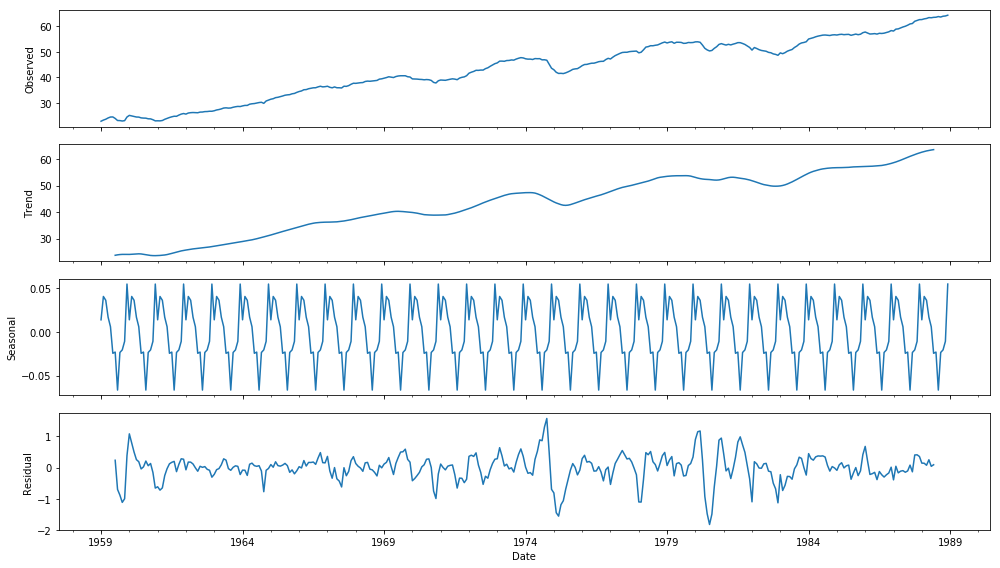

In [46]:
dataset = data
dataset.reset_index(inplace=True)
dataset['Date'] = pd.to_datetime(data['Date']) 
dataset = dataset.set_index('Date') 
rcParams['figure.figsize'] = 14, 8
sm.tsa.seasonal_decompose(dataset.Value, 'additive').plot()
plt.show()

Tренд: есть единичные корни, ряд не стационарен  
Сезональность: единичных корней нет, ряд стационарен  
Остаток: единичных корней нет, ряд стационарен

## Мультипликативная модель

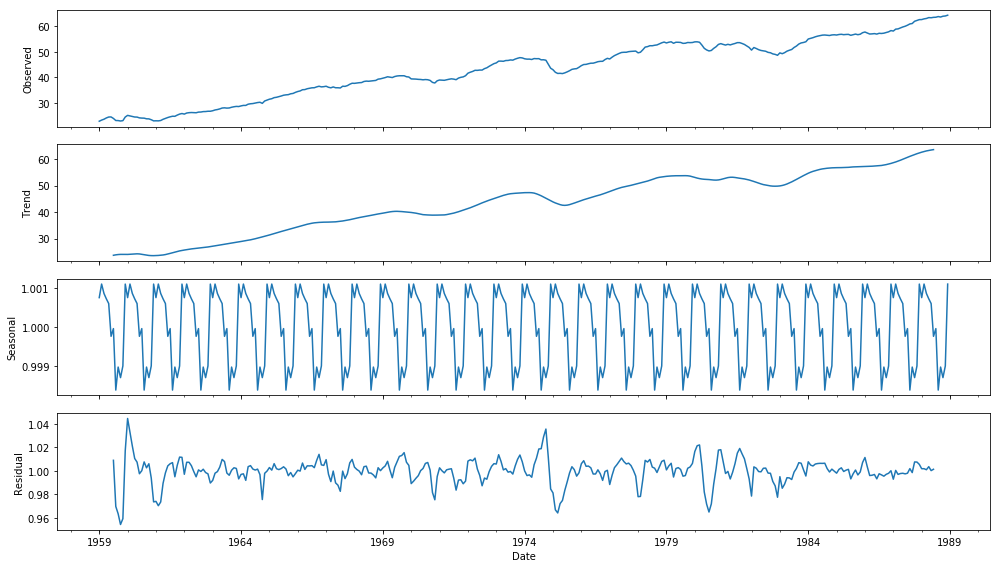

In [47]:
sm.tsa.seasonal_decompose(dataset.Value, 'multiplicate').plot()
plt.show()

Tренд: есть единичные корни, ряд не стационарен  
Сезональность: единичных корней нет, ряд стационарен  
Остаток: единичных корней нет, ряд стационарен

# Нахождение порядка интегрированности ряда

In [48]:
order = 0
test = data.Value
while (not DFtest(test)):
    test = test.diff().dropna()
    order += 1
print('Порядок интегрированности: ', order)

adf:  -0.25339117992846366
p-value:  0.9318510422993465
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Есть единичные корни, ряд не стационарен
adf:  -7.36731149521199
p-value:  9.164149561097916e-11
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Единичных корней нет, ряд стационарен
Порядок интегрированности:  1


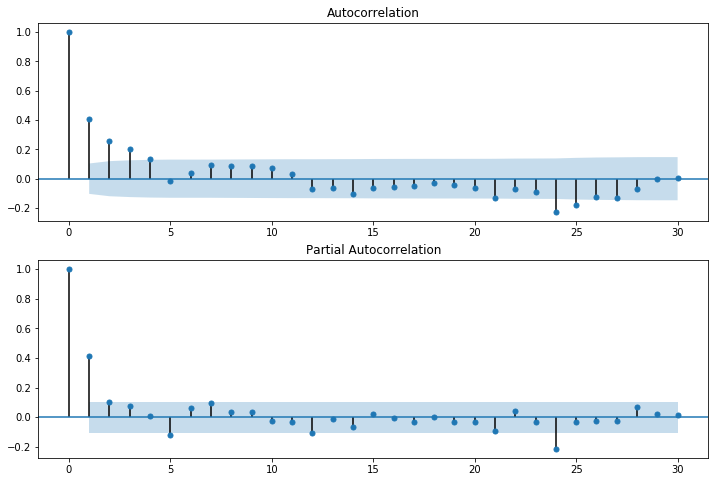

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(test, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(test, lags=30, ax=ax2)

In [101]:

model1 = sm.tsa.ARIMA(data.Value.squeeze(), order=(1, 1, 3)).fit()
#model2 = sm.tsa.ARIMA(data.Value.squeeze(), order=(12, 1, 3),).fit()
#model3 = sm.tsa.ARIMA(data.Value.squeeze(), order=(24, 1, 4),).fit()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [70]:
data_test = pd.read_excel("testing.xlsx")
datat.tail()

,Date,Value
55,1993-08-01,67.5985
56,1993-09-01,67.9241
57,1993-10-01,68.4390
58,1993-11-01,68.7289
59,1993-12-01,69.0884


In [95]:
pr1 = model1.predict(start=data.shape[0],
                        end=data.shape[0]+data_test.shape[0]-1, typ='levels')
pr2 = model2.predict(start=data.shape[0],
                        end=data.shape[0]+data_test.shape[0]-1, typ='levels')
pr3 = model3.predict(start=data.shape[0],
                        end=data.shape[0]+data_test.shape[0]-1, typ='levels')

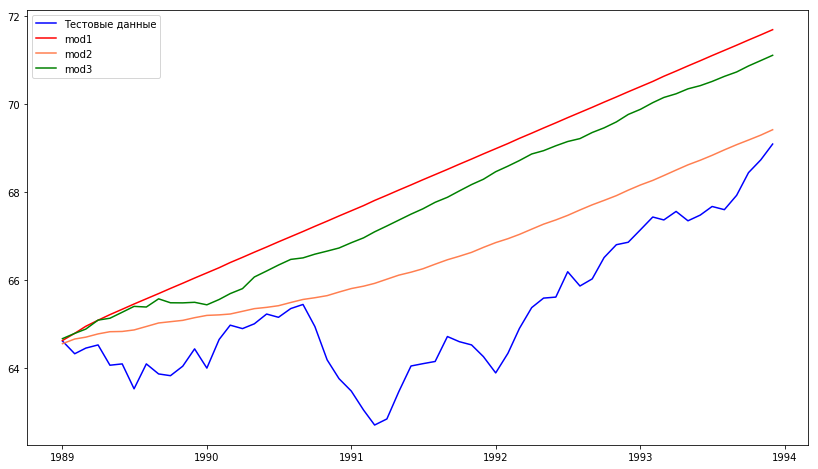

In [96]:
plt.plot(data_test.Date, data_test.Value, 'b', label = 'Тестовые данные')
plt.plot(data_test.Date, pr1, 'r', label = 'mod1')
plt.plot(data_test.Date, pr2, 'coral', label = 'mod2')
plt.plot(data_test.Date, pr3, 'g', label = 'mod3')
plt.legend(loc='upper left')
plt.show()

In [98]:
r21 = sk.r2_score(data_test.Value, pr1)
r22 = sk.r2_score(data_test.Value, pr2)
r23 = sk.r2_score(data_test.Value, pr3)
print('r2 model1:', r21)
print('r2 model2:', r22)
print('r2 model3:', r23)

r2 model1: -3.32067665533034
r2 model2: 0.020449685874000978
r2 model3: -2.0631705180776367


In [107]:
print('AIC model1:', model1.aic)
print('AIC model2:', model2.aic)
print('AIC model3:', model3.aic)

AIC model1: 251.08321143936394
AIC model2: 248.79218215212347
AIC model3: 254.70169809359902
